In [1]:
import pandas as pd
import numpy as np

import itertools
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config IPCompleter.greedy=True 
%env OMP_NUM_THREADS = 4
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import RandomizedSearchCV
from pandas_profiling import ProfileReport
from sklearn.metrics import mean_absolute_error,mean_squared_error,make_scorer
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

env: OMP_NUM_THREADS=4


In [3]:
df = pd.read_csv("C:/Users/krist/Desktop/Queens/MMA 869/marketing.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     500 non-null    float64
 1   Income  500 non-null    float64
 2   Bought  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


,Age,Income,Bought
0,0.748126,1.185890,0
1,-1.645760,-2.933332,1
2,0.279829,0.835401,0
3,0.195853,1.249209,0
4,-1.357053,-1.409123,1


In [5]:
feature_names = ['Age', 'Income']
X = df[feature_names].to_numpy()
y = df['Bought'].to_numpy()


In [6]:
type(X)

numpy.ndarray

In [9]:
#EDA of variables
prof = ProfileReport(df, minimal=False) 
prof.to_notebook_iframe()

In [14]:
df.isna().sum()

Age       0
Income    0
Bought    0
dtype: int64

# Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

type(X_train)
type(y_train)

numpy.ndarray

numpy.ndarray

# Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [17]:
class_names = [str(x) for x in clf.classes_]

# Use the Model to Predict Someone New

In [9]:
new_data = [[0.5, 1.24]]
clf.predict_proba(new_data)
clf.predict(new_data)

array([[0.93922652, 0.06077348]])

array([0], dtype=int64)

# Model Performance

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)

array([[50,  5],
       [ 5, 40]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.89      0.89      0.89        45

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [138]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))

Accuracy = 0.90
Kappa = 0.80
F1 Score = 0.89
Log Loss = 3.45


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'Decision Tree ROC Curve')

0.9462626262626264

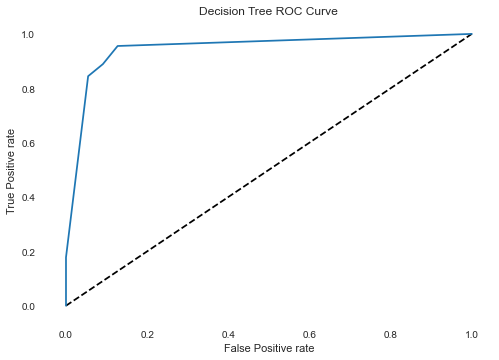

In [11]:
clf.fit(X_train,y_train)
y_probas_clf=clf.predict_proba(X_test)[:,1]

#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_probas_clf)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("Decision Tree ROC Curve")

roc_auc_score(y_test, y_probas_clf)

# Model Visualization

[Text(247.99999999999997, 261.6075, 'X[0] <= -0.058\nentropy = 1.0\nsamples = 400\nvalue = [196, 204]'),
 Text(148.79999999999998, 186.8625, 'X[1] <= -0.155\nentropy = 0.401\nsamples = 201\nvalue = [16, 185]'),
 Text(99.19999999999999, 112.1175, 'X[0] <= -0.776\nentropy = 0.227\nsamples = 163\nvalue = [6, 157]'),
 Text(49.599999999999994, 37.3725, 'entropy = 0.29\nsamples = 118\nvalue = [6, 112]'),
 Text(148.79999999999998, 37.3725, 'entropy = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(198.39999999999998, 112.1175, 'entropy = 0.831\nsamples = 38\nvalue = [10, 28]'),
 Text(347.19999999999993, 186.8625, 'X[0] <= 0.225\nentropy = 0.454\nsamples = 199\nvalue = [180, 19]'),
 Text(297.59999999999997, 112.1175, 'entropy = 0.991\nsamples = 18\nvalue = [10, 8]'),
 Text(396.79999999999995, 112.1175, 'entropy = 0.331\nsamples = 181\nvalue = [170, 11]')]

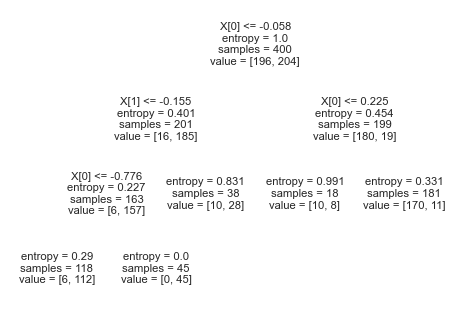

In [29]:
from sklearn import tree
tree.plot_tree(clf)

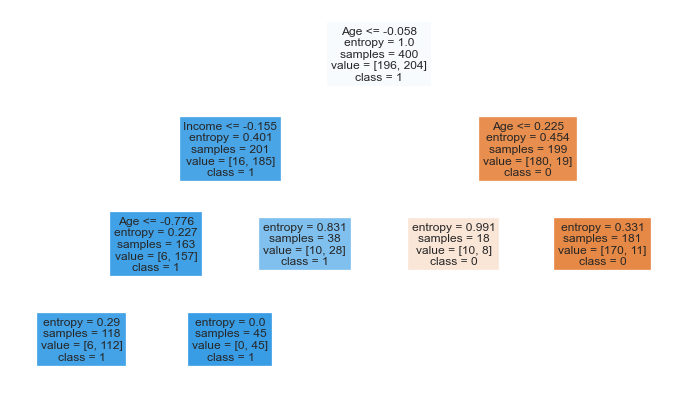

In [113]:
#Bigger and prettier!

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7));
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

In [12]:
#GridSearch for Decision Tree model

from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(splitter='best', class_weight=None, random_state=42)

params = {'criterion': ('gini', 'entropy'), 
              'max_depth': [2, 10, 20,30,40], 
              'min_samples_leaf': [1,3,5,10],
              'max_features':[None,5,10,15,20, 'auto'], 
              'max_leaf_nodes':[None, 10,20,30,40,50,60]}

gridsearch = GridSearchCV(clf, params, scoring='roc_auc', cv=5, return_train_score=True)

%time gridsearch.fit(X, y)

Wall time: 36 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 10, 20, 30, 40],
                         'max_features': [None, 5, 10, 15, 20, 'auto'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [1, 3, 5, 10]},
             return_train_score=True, scoring='roc_auc')

In [141]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5}

In [142]:
# Print out the results of hyperparmater tuning in a nice table.

def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    results['mean_fit_time'] = cv_results['mean_fit_time']
    results['mean_score_time'] = cv_results['mean_score_time']
    results['mean_train_score'] = cv_results['mean_train_score']
    results['std_train_score'] = cv_results['std_train_score']
    results['mean_test_score'] = cv_results['mean_test_score']
    results['std_test_score'] = cv_results['std_test_score']
    results['rank_test_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_test_score'], ascending=False)
    return results

cv_results_to_df(gridsearch.cv_results_)

,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
654,gini,30,auto,20.0,5,0.001000,0.0016,0.978330,0.003213,0.939316,0.013607,1
486,gini,20,auto,20.0,5,0.001400,0.0020,0.978330,0.003213,0.939316,0.013607,1
318,gini,10,auto,20.0,5,0.001200,0.0014,0.978330,0.003213,0.939316,0.013607,1
822,gini,40,auto,20.0,5,0.001400,0.0018,0.978330,0.003213,0.939316,0.013607,1
498,gini,20,auto,50.0,5,0.001600,0.0018,0.986342,0.001037,0.939116,0.017479,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1647,entropy,40,20,50.0,10,0.001400,0.0000,NaN,NaN,NaN,NaN,891
1648,entropy,40,20,60.0,1,0.001599,0.0000,NaN,NaN,NaN,NaN,890
1649,entropy,40,20,60.0,3,0.002000,0.0000,NaN,NaN,NaN,NaN,889
1650,entropy,40,20,60.0,5,0.001801,0.0000,NaN,NaN,NaN,NaN,888


DecisionTreeClassifier(max_depth=10, max_features='auto', max_leaf_nodes=20,
                       min_samples_leaf=5, random_state=42)

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'Decition Tree ROC Curve')

0.9517171717171719

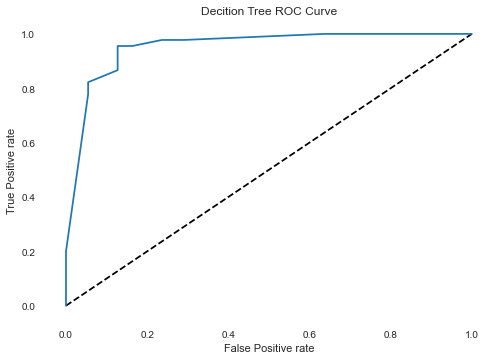

In [144]:
#Refitting decision tree model after Gridsearch

gridsearch.best_estimator_.fit(X_train,y_train)

y_probas_clf_grid=gridsearch.best_estimator_.predict_proba(X_test)[:,1]

#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_probas_clf_grid)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="Decition Tree")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("Decition Tree ROC Curve")

roc_auc_score(y_test, y_probas_clf_grid)


In [145]:
#RANDOM SEARCH FOR DECISION TREE MODEL
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params_random = {"criterion": ["gini", "entropy"],
               "max_depth": sp_randint(2, 21),
               "min_samples_leaf": sp_randint(1, 11),
               "max_features": sp_randint(1, 3),
               "max_leaf_nodes": sp_randint(10, 100),
              }

randomsearch = RandomizedSearchCV(clf, param_distributions=params_random, 
                                  cv=5, return_train_score=True, n_iter=500);
%time randomsearch.fit(X_train, y_train);

Wall time: 10 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B6F7F3A0A0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B6F85B3040>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B6F8220D60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B6F87836A0>},
                   return_train_score=True)

In [146]:
randomsearch.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2, max_leaf_nodes=52,
                       min_samples_leaf=7, random_state=42)

In [147]:
cv_results_to_df(randomsearch.cv_results_)

,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
415,gini,4,2,52,7,0.001600,0.000400,0.923125,0.012119,0.9075,0.028062,1
366,gini,17,2,46,9,0.001800,0.000400,0.916250,0.008705,0.9075,0.029155,2
331,gini,9,1,98,8,0.001200,0.000600,0.923125,0.012437,0.9075,0.035882,2
150,gini,19,2,32,10,0.002001,0.000799,0.916250,0.008705,0.9075,0.029155,2
1,gini,10,1,10,8,0.002201,0.001199,0.923125,0.012437,0.9075,0.035882,2
...,...,...,...,...,...,...,...,...,...,...,...,...
222,entropy,10,2,77,1,0.002400,0.001000,0.990000,0.005728,0.8525,0.053268,491
482,gini,19,1,57,2,0.001601,0.000399,0.948125,0.007552,0.8500,0.023717,497
229,gini,15,1,90,2,0.001801,0.000400,0.948125,0.007552,0.8500,0.023717,497
458,gini,19,1,57,2,0.001200,0.000200,0.948125,0.007552,0.8500,0.023717,497


RandomForestClassifier(random_state=42)

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'Random Forest ROC Curve')

0.9531313131313132

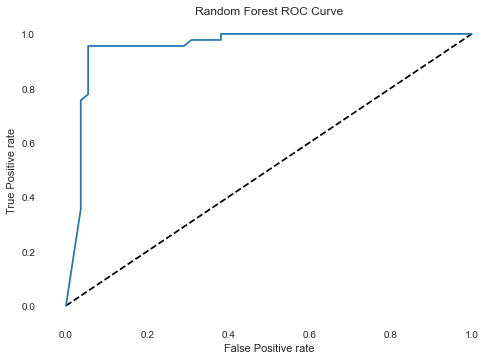

In [149]:
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
y_probas_forest=forest_clf.predict_proba(X_test)[:,1]

#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_probas_forest)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("Random Forest ROC Curve")

roc_auc_score(y_test, y_probas_forest)

# Naive Bayes
Naive Bayes is a classification algorithm

In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

In [47]:
y_pred_gnb

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# Model Parameters

In [49]:
gnb.theta_ # Mean of each feature per class
gnb.sigma_ # Variance of each feature per class

array([[ 0.99887777,  1.06512859],
       [-0.91827636, -1.08561939]])

array([[0.70142311, 0.949339  ],
       [0.62737657, 1.68858577]])

In [51]:
confusion_matrix(y_test, y_pred_gnb)

array([[51,  4],
       [ 2, 43]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred_gnb, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.91      0.96      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [55]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_gnb)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_gnb)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gnb)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_gnb)))

Accuracy = 0.94
Kappa = 0.88
F1 Score = 0.93
Log Loss = 2.07


# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

KNeighborsClassifier(n_neighbors=3)

In [58]:
knn_clf.effective_metric_
knn_clf.effective_metric_params_

'euclidean'

{}

In [60]:
print(confusion_matrix(y_test, y_pred_knn))

[[47  8]
 [ 2 43]]


In [62]:

print(classification_report(y_test, y_pred_knn, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        55
           1       0.84      0.96      0.90        45

    accuracy                           0.90       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100



KNeighborsClassifier()

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'KNN ROC Curve')

0.9612121212121212

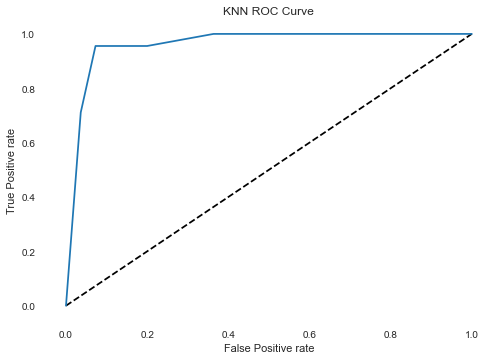

In [150]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_probas_knn=knn_clf.predict_proba(X_test)[:,1]

#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_probas_knn)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("KNN ROC Curve")

roc_auc_score(y_test, y_probas_knn)

In [69]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_knn)))

Accuracy = 0.90
Kappa = 0.80
F1 Score = 0.90
Log Loss = 3.45


# SVM - Linear

In [109]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.025)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

SVC(C=0.025, kernel='linear')

In [73]:
svm_clf.n_support_

array([70, 69])

In [75]:

svm_clf.intercept_

array([0.0853027])

In [77]:

print(confusion_matrix(y_test, y_pred_svm))

[[51  4]
 [ 2 43]]


In [78]:
print(classification_report(y_test, y_pred_svm, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.91      0.96      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [79]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))

Accuracy = 0.94
Kappa = 0.88
F1 Score = 0.93
Log Loss = 2.07


In [87]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)
     
# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

# use the fitted model to predict the testing data 
y_pred_prob_svm = Classifier_SVM.predict_proba(X_test)[:,1] # probabilities

Pipeline(steps=[('standardize', StandardScaler()),
                ('svm', SVC(probability=True))])

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'SVM ROC Curve')

0.9648484848484848

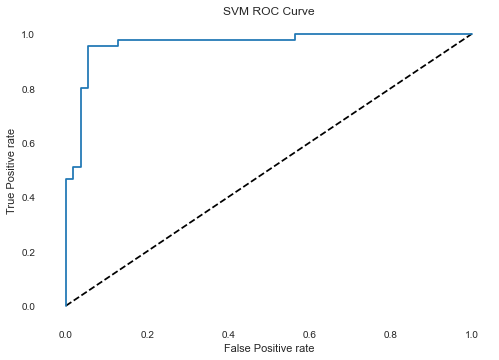

In [151]:
#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob_svm)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("SVM ROC Curve")

roc_auc_score(y_test, y_pred_prob_svm)

# NN

In [91]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-3, 
                       hidden_layer_sizes=(3), random_state=1, verbose=True)
nn_clf.fit(X_train, y_train)

y_pred_nn = nn_clf.predict(X_test)

MLPClassifier(alpha=0.001, hidden_layer_sizes=3, random_state=1, solver='lbfgs',
              verbose=True)

In [92]:
nn_clf.loss_

0.27106495217791654

In [93]:
w = nn_clf.coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.
w

[array([[ 0.97565259,  1.08832583, -1.04406553],
        [-1.66548065, -1.62569205, -0.61746919]]),
 array([[ 3.91733101],
        [-2.57062869],
        [ 1.76672827]])]

In [95]:
print(confusion_matrix(y_test, y_pred_nn))

[[51  4]
 [ 2 43]]


In [97]:
print(classification_report(y_test, y_pred_nn, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.91      0.96      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [98]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_nn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_nn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_nn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_nn)))

Accuracy = 0.94
Kappa = 0.88
F1 Score = 0.93
Log Loss = 2.07


MLPClassifier(alpha=0.001, hidden_layer_sizes=3, random_state=1, solver='lbfgs',
              verbose=True)

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'NN ROC Curve')

0.9587878787878787

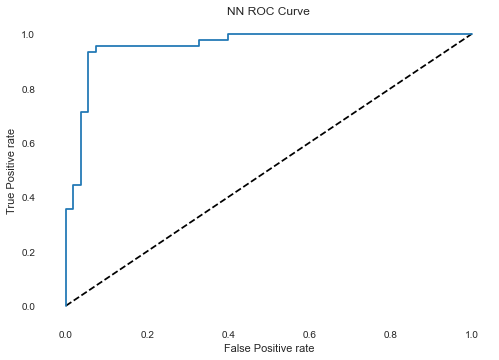

In [152]:
nn_clf=MLPClassifier()
nn_clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-3, 
                       hidden_layer_sizes=(3), random_state=1, verbose=True)
nn_clf.fit(X_train, y_train)
y_probas_nn=nn_clf.predict_proba(X_test)[:,1]

#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_probas_nn)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="NN")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("NN ROC Curve")

roc_auc_score(y_test, y_probas_nn)

LogisticRegression(random_state=42)

Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

0.9547474747474748

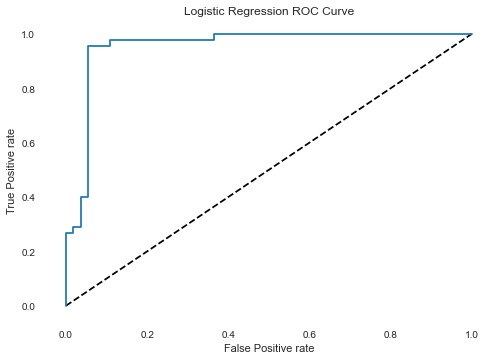

In [112]:
from sklearn.linear_model import LogisticRegression
logistic_clf=LogisticRegression(random_state=42)
logistic_clf.fit(X_train,y_train)
y_probas_logistic=logistic_clf.predict_proba(X_test)[:,1]

#ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_probas_logistic)

plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("Logistic Regression ROC Curve")

roc_auc_score(y_test, y_probas_logistic)